# Project on Hypothesis Testing

In [1]:
pwd

'C:\\Users\\Vicky\\Desktop\\GL PRoject practice\\Project statistcis'

In [2]:
import pandas as pd

In [3]:
pardata = pd.read_csv('sm4-golf.csv')

In [4]:
pardata

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [5]:
pardata['Current']

0     264
1     261
2     267
3     272
4     258
5     283
6     258
7     266
8     259
9     270
10    263
11    264
12    284
13    263
14    260
15    283
16    255
17    272
18    266
19    268
20    270
21    287
22    289
23    280
24    272
25    275
26    265
27    260
28    278
29    275
30    281
31    274
32    273
33    263
34    275
35    267
36    279
37    274
38    276
39    262
Name: Current, dtype: int64

In [7]:
pardata['New']

0     277
1     269
2     263
3     266
4     262
5     251
6     262
7     289
8     286
9     264
10    274
11    266
12    262
13    271
14    260
15    281
16    250
17    263
18    278
19    264
20    272
21    259
22    264
23    280
24    274
25    281
26    276
27    269
28    268
29    262
30    283
31    250
32    253
33    260
34    270
35    263
36    261
37    255
38    263
39    279
Name: New, dtype: int64

In [8]:
group1 = pardata['Current']
group2 = pardata['New']

Descriptive Statistics using describe to describe the current data

In [10]:
pardata.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [11]:
pardata.dtypes

Current    int64
New        int64
dtype: object

Calculating IQR 


In [12]:
import numpy as np


In [13]:
q75, q25 = np.percentile(group1,[75,25])

In [14]:
iqr = q75 -q25

In [15]:
iqr

12.25

Plotting 

In [17]:
fig1 = pardata.boxplot('Current')

In [22]:
pardata['Current']

0     264
1     261
2     267
3     272
4     258
5     283
6     258
7     266
8     259
9     270
10    263
11    264
12    284
13    263
14    260
15    283
16    255
17    272
18    266
19    268
20    270
21    287
22    289
23    280
24    272
25    275
26    265
27    260
28    278
29    275
30    281
31    274
32    273
33    263
34    275
35    267
36    279
37    274
38    276
39    262
Name: Current, dtype: int64

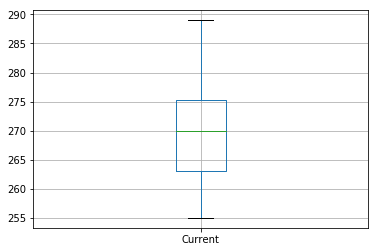

In [23]:
pardata.boxplot('Current')

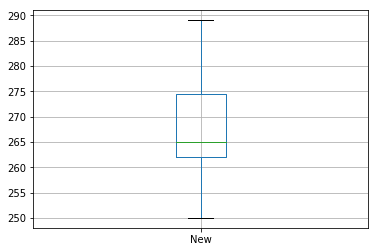

In [24]:
pardata.boxplot('New')

Importing ttest_ind, levene, shapiro , mannwhitneyu 
Also importing ttest_power from stats.model 

In [25]:
from scipy.stats import ttest_ind, mannwhitneyu , levene ,shapiro

In [27]:
from statsmodels.stats.power import ttest_power

Assuming the data to be parametric in nature hence the ttest_ind for teo independent sample. 

In [29]:
t_statistic,p_value = ttest_ind(group1,group2)
print(t_statistic,p_value)

1.3283615935245678 0.18793228491854663


The p_value in this case is > o.5 which means we will accept the null hypothesis and drop the alternate hypothesis. 

Now Assuming the data to be non parrametric in nature 

In [30]:
u,p_value = mannwhitneyu(group1,group2)
print(u,p_value)

668.0 0.10265192122893124


In this case as well when assumed the data to be non parametric in nature the alternate hypothesis is dropped and we accept the null hypothesis. 

Levene test is used in order to know whether the variances are equal where the null hypothesis says that the variances are equal. 

In [31]:
levene(group1,group2)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

Pvalue is > o.5 hence the null hypothesis is accepted. 

Shapiro test is analysis of understanding whehther data is normally distributed or not for
univariate dataset.

In [33]:
shapiro(group1)

(0.9707046747207642, 0.378787100315094)

In [34]:
shapiro(group2)

(0.9678263664245605, 0.3064655363559723)

In [45]:
(np.mean(group1)-np.mean(group2)) / np.sqrt(((40-1)*np.var(group1)+(40-1)*np.var(group2))/40+40-2)

0.19431534815781365

In [46]:
print(ttest_power(0.194,nobs=40,alpha=0.05,alternative='two-sided'))

0.22350267230946855


SO, After investigating all the above cases we found that the null hypothesis can;t be rejected and hence we need to drop the idea of alternate hypothesis. Where the introduction of new cut resistenat balls will not increase the share of the PAR INC.. 


In [47]:
import seaborn as sns

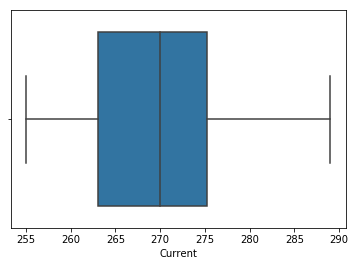

In [50]:
sns.boxplot(group1)

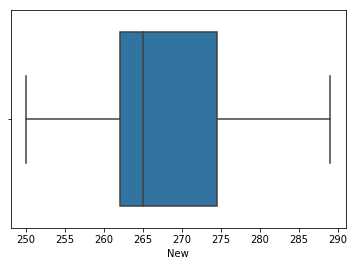

In [51]:
sns.boxplot(group2)